In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats

In [2]:
# Import data from npy-file
shakB2_wt_Control = np.load('shakB2_w+_Control_ps_osci.npy')
shakB2_PTX_MEC_Ctrl = np.load('shakB2_PTX_MEC_Ctrl_ps_osci.npy')
shakB2_PTX_MEC = np.load('shakB2_PTX_MEC_ps_osci.npy')
shakB2_PTX_MEC_IVA = np.load('shakB2_PTX_MEC_IVA_ps_osci.npy')
shakB2_TTx = np.load('shakB2_TTx_ps_osci.npy')
shakB_RNAi = np.load('shakB_RNAi_ps_osci.npy')
shakB_RNAi_tubG80 = np.load('tubGal80ts_shakB_RNAi_ps_osci.npy')

In [3]:
shakB2_wt_Control.shape

(2250L, 17L)

In [4]:
shakB2_wt_Control_mean = np.mean(shakB2_wt_Control, axis=1)
shakB2_PTX_MEC_Ctrl_mean = np.mean(shakB2_PTX_MEC_Ctrl, axis=1)
shakB2_PTX_MEC_mean = np.mean(shakB2_PTX_MEC, axis=1)
shakB2_PTX_MEC_IVA_mean = np.mean(shakB2_PTX_MEC_IVA, axis=1)
shakB2_TTx_mean = np.mean(shakB2_TTx, axis=1)
shakB_RNAi_mean = np.mean(shakB_RNAi, axis=1)
shakB_RNAi_tubG80_mean = np.mean(shakB_RNAi_tubG80, axis=1)

fs = 3.75600961538462
freqs = np.fft.fftfreq(len(shakB2_PTX_MEC_Ctrl_mean), 1/fs)
idx = np.argsort(freqs)

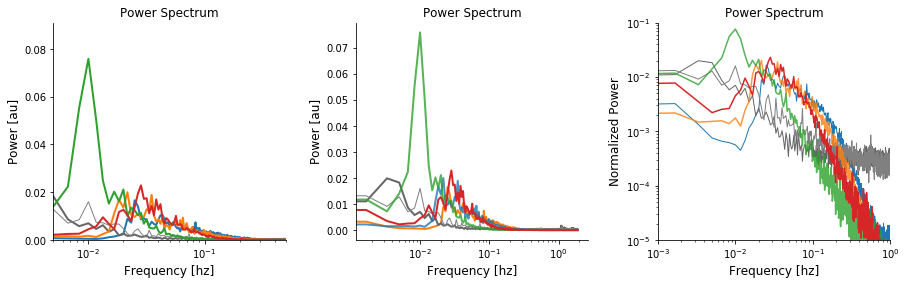

In [5]:
fig = plt.figure(figsize = (15,4))
plt.subplots_adjust(wspace=0.3)

ax = fig.add_subplot(131)
plt.xscale('log')
plt.xlim([0.005,0.5])
plt.ylim([0,np.max(shakB2_PTX_MEC_IVA_mean)*1.2])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.plot(freqs[idx], shakB2_PTX_MEC_Ctrl_mean[idx], color='C0', linewidth='2')
plt.plot(freqs[idx], shakB2_TTx_mean[idx], color='0.4', linewidth='2')
plt.plot(freqs[idx], shakB2_wt_Control_mean[idx], color='0.5', linewidth='1')
plt.plot(freqs[idx], shakB2_PTX_MEC_mean[idx], color='C1', linewidth='2')
plt.plot(freqs[idx], shakB2_PTX_MEC_IVA_mean[idx], color='C2', linewidth='2')
plt.plot(freqs[idx], shakB_RNAi_mean[idx], color='C3', linewidth='2')
ax.set_title('Power Spectrum', size=12)
ax.set_xlabel('Frequency [hz]', size=12)
ax.set_ylabel('Power [au]', size=12)

ax = fig.add_subplot(132)
plt.xscale('log')
#plt.xlim([0.001,1])
#plt.ylim([0,0.03])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.plot(freqs[idx], shakB2_PTX_MEC_Ctrl_mean[idx], color='C1', linewidth='2')
plt.plot(freqs[idx], shakB2_TTx_mean[idx], color='0.4', linewidth='2')
plt.plot(freqs[idx], shakB2_wt_Control_mean[idx], color='0.5', linewidth='1')
plt.plot(freqs[idx], shakB2_PTX_MEC_mean[idx], color='C0', linewidth='2', alpha=0.8)
plt.plot(freqs[idx], shakB2_PTX_MEC_IVA_mean[idx], color='C2', linewidth='2', alpha=0.8)
plt.plot(freqs[idx], shakB_RNAi_mean[idx], color='C3', linewidth='2')
ax.set_title('Power Spectrum', size=12)
ax.set_xlabel('Frequency [hz]', size=12)
ax.set_ylabel('Power [au]', size=12)

ax = fig.add_subplot(133)
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.001,1])
plt.ylim([0.00001,0.1])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.plot(freqs[idx], shakB2_PTX_MEC_Ctrl_mean[idx], color='C0', linewidth='1')
plt.plot(freqs[idx], shakB2_TTx_mean[idx], color='0.4', linewidth='1')
plt.plot(freqs[idx], shakB2_wt_Control_mean[idx], color='0.5', linewidth='1')
plt.plot(freqs[idx], shakB2_PTX_MEC_mean[idx], color='C1', linewidth='1.5', alpha=0.8)
plt.plot(freqs[idx], shakB2_PTX_MEC_IVA_mean[idx], color='C2', linewidth='1.5', alpha=0.8)
plt.plot(freqs[idx], shakB_RNAi_mean[idx], color='C3', linewidth='1.5')
ax.set_title('Power Spectrum', size=12)
ax.set_xlabel('Frequency [hz]', size=12)
ax.set_ylabel('Normalized Power', size=12)
plt.show()

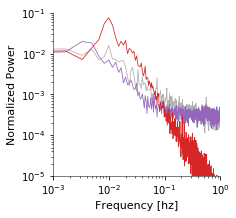

In [6]:
fig = plt.figure(figsize = (3,3))
ax = fig.add_subplot(111)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.plot(freqs[idx], shakB2_wt_Control_mean[idx], color='0.5', linewidth='0.8', alpha=0.6)
#plt.plot(freqs[idx], shakB2_PTX_MEC_Ctrl_mean[idx], color='#FF7400', linewidth='0.8')
plt.plot(freqs[idx], shakB2_TTx_mean[idx], color='C4', linewidth='0.8')
#plt.plot(freqs[idx], shakB2_PTX_MEC_mean[idx], color='C0', linewidth='0.8')
plt.plot(freqs[idx], shakB2_PTX_MEC_IVA_mean[idx], color='C3', linewidth='0.8')
#plt.plot(freqs[idx], shakB_RNAi_mean[idx], color='#009999', linewidth='2')
#plt.plot(freqs[idx], shakB_RNAi_tubG80_mean[idx], color='C2', linewidth='0.8')


plt.xscale('log')
plt.yscale('log')
plt.xlim([0.001,1])
plt.ylim([0.00001,0.1])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0.5)

#ax.set_title('Power Spectrum', size=12)
ax.set_xlabel('Frequency [hz]', size=11)
ax.set_ylabel('Normalized Power', size=11)

plt.savefig('Power_Spectrum_Imaging_pharma_TTXIVA.pdf',bbox_inches='tight', format='pdf')
plt.show()

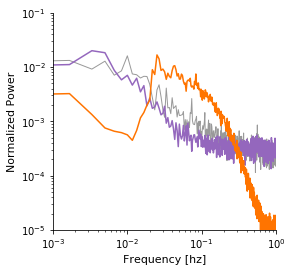

In [7]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111)
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.001,1])
plt.ylim([0.00001,0.1])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.plot(freqs[idx], shakB2_wt_Control_mean[idx], color='0.5', linewidth='1', alpha=0.8)
plt.plot(freqs[idx], shakB2_TTx_mean[idx], color='C4', linewidth='1.5')
plt.plot(freqs[idx], shakB2_PTX_MEC_Ctrl_mean[idx], color='#FF7400', linewidth='1.5')
#plt.plot(freqs[idx], shakB2_PTX_MEC_mean[idx], color='C0', linewidth='1.5', alpha=0.8)
#plt.plot(freqs[idx], shakB2_PTX_MEC_IVA_mean[idx], color='C3', linewidth='1.5', alpha=0.8)
#plt.plot(freqs[idx], shakB_RNAi_mean[idx], color='#FF7400', linewidth='1.5')
#ax.set_title('Power Spectrum', size=12)
ax.set_xlabel('Frequency [hz]', size=11)
ax.set_ylabel('Normalized Power', size=11)

#plt.savefig('Power_Spectrum_Imaging.pdf',bbox_inches='tight', format='pdf')
plt.show()

In [8]:
# Calculate Beta Power (10-30Hz) and ultra slow wave power (0.02-0.2)

a = freqs[idx]
b = shakB2_PTX_MEC_Ctrl[idx,:]

freq_lower_bound = (np.abs(a - 0.02)).argmin() # define lower bound for frequency range in Hz
freq_upper_bound = (np.abs(a - 0.2)).argmin() # define upper bound for frequency range in Hz


usw_power_shakB2_PTX_MEC_Ctrl = np.mean(shakB2_PTX_MEC_Ctrl[idx,:][freq_lower_bound:freq_upper_bound], axis=0)
usw_power_shakB2_PTX_MEC = np.mean(shakB2_PTX_MEC[idx,:][freq_lower_bound:freq_upper_bound], axis=0)
usw_power_shakB2_PTX_MEC_IVA = np.mean(shakB2_PTX_MEC_IVA[idx,:][freq_lower_bound:freq_upper_bound], axis=0)
usw_power_shakB2_TTx = np.mean(shakB2_TTx[idx,:][freq_lower_bound:freq_upper_bound], axis=0)
usw_power_shakB_RNAi = np.mean(shakB_RNAi[idx,:][freq_lower_bound:freq_upper_bound], axis=0)
usw_power_shakB2_wt_Control = np.mean(shakB2_wt_Control[idx,:][freq_lower_bound:freq_upper_bound], axis=0)
usw_power_shakB_RNAi_tubG80 = np.mean(shakB_RNAi_tubG80[idx,:][freq_lower_bound:freq_upper_bound], axis=0)

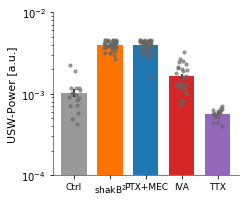

In [9]:
# Make Figure for usw-power

fig = plt.figure(figsize = (3.333,3))
plt.subplots_adjust(wspace=0.5)
w=0.7
ax = fig.add_subplot(111)
plt.yscale('log')
ax.bar(0,height=[np.mean(usw_power_shakB2_wt_Control)],width=w,color='0.6',yerr=[stats.sem(usw_power_shakB2_wt_Control)])
ax.bar(1,height=[np.mean(usw_power_shakB2_PTX_MEC_Ctrl)],width=w,color='#FF7400',yerr=[stats.sem(usw_power_shakB2_PTX_MEC_Ctrl)])
ax.bar(2,height=[np.mean(usw_power_shakB2_PTX_MEC)],width=w,color='C0',yerr=[stats.sem(usw_power_shakB2_PTX_MEC)])
ax.bar(3,height=[np.mean(usw_power_shakB2_PTX_MEC_IVA)],width=w,color='C3',yerr=[stats.sem(usw_power_shakB2_PTX_MEC_IVA)])
ax.bar(4,height=[np.mean(usw_power_shakB2_TTx)],width=w,color='C4',yerr=[stats.sem(usw_power_shakB2_TTx)])
ax.axhline(y=0, color='0.4', linewidth='1')

for i in range(len(usw_power_shakB2_wt_Control)):
    ax.scatter(0 + np.random.random(1) * w/2 - w/4,usw_power_shakB2_wt_Control[i], s=10, color='0.4', alpha=0.6, zorder = 2)
for i in range(len(usw_power_shakB2_PTX_MEC_Ctrl)):
    ax.scatter(1 + np.random.random(1) * w/2 - w/4,usw_power_shakB2_PTX_MEC_Ctrl[i], s=10, color='0.4', alpha=0.6, zorder = 2)
for i in range(len(usw_power_shakB2_PTX_MEC)):
    ax.scatter(2 + np.random.random(1) * w/2 - w/4,usw_power_shakB2_PTX_MEC[i], s=10, color='0.4', alpha=0.6, zorder = 2)
for i in range(len(usw_power_shakB2_PTX_MEC_IVA)):
    ax.scatter(3 + np.random.random(1) * w/2 - w/4,usw_power_shakB2_PTX_MEC_IVA[i], s=10, color='0.4', alpha=0.6, zorder = 2)       
for i in range(len(usw_power_shakB2_TTx)):
    ax.scatter(4 + np.random.random(1) * w/2 - w/4,usw_power_shakB2_TTx[i], s=10, color='0.4', alpha=0.6, zorder = 2)             


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel('USW-Power [a.u.]', size=11)
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(('Ctrl','shakB$^2$','PTX+MEC','IVA','TTX'), size=9)
plt.ylim([0.0001,0.01])
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0.5)

plt.savefig('USW_power_Imaging_barplot_pharma.pdf',bbox_inches='tight', format='pdf')
plt.show()


In [11]:
stats.ttest_ind(usw_power_shakB2_wt_Control, usw_power_shakB2_PTX_MEC_IVA, axis=0, equal_var=False)

Ttest_indResult(statistic=-3.7603962843928986, pvalue=0.0005294259186972855)

In [11]:
freq_max_shakB2_PTX_MEC_Ctrl = np.absolute(freqs[idx][np.argmax(shakB2_PTX_MEC_Ctrl[idx], axis=0)])
freq_max_shakB2_PTX_MEC = np.absolute(freqs[idx][np.argmax(shakB2_PTX_MEC[idx], axis=0)])
freq_max_shakB2_PTX_MEC_IVA = np.absolute(freqs[idx][np.argmax(shakB2_PTX_MEC_IVA[idx], axis=0)])
freq_max_shakB2_TTx = np.absolute(freqs[idx][np.argmax(shakB2_TTx[idx], axis=0)])
freq_max_shakB_RNAi = np.absolute(freqs[idx][np.argmax(shakB_RNAi[idx], axis=0)])
freq_max_shakB2_wt_Control = np.absolute(freqs[idx][np.argmax(shakB2_wt_Control[idx], axis=0)])
freq_max_shakB_RNAi_tubG80 = np.absolute(freqs[idx][np.argmax(shakB_RNAi_tubG80[idx], axis=0)])

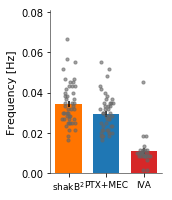

In [12]:
# Make Figure for Osci.Freq, Error bars are std

fig = plt.figure(figsize = (2,3))
plt.subplots_adjust(wspace=0.5)
ax = fig.add_subplot(111)
w=0.7

ax.bar(0,height=[np.mean(freq_max_shakB2_PTX_MEC_Ctrl)],width=w,color='#FF7400',yerr=[stats.sem(freq_max_shakB2_PTX_MEC_Ctrl)])
ax.bar(1,height=[np.mean(freq_max_shakB2_PTX_MEC)],width=w,color='C0',yerr=[stats.sem(freq_max_shakB2_PTX_MEC)])
ax.bar(2,height=[np.mean(freq_max_shakB2_PTX_MEC_IVA)],width=w,color='C3',yerr=[stats.sem(freq_max_shakB2_PTX_MEC_IVA)])
#ax.bar(3,height=[np.mean(freq_max_shakB2_TTx)],width=w,color='C3',yerr=[stats.sem(freq_max_shakB2_TTx)])
#ax.bar(4,height=[np.mean(freq_max_shakB2_wt_Control)],width=w,color='C4',yerr=[stats.sem(freq_max_shakB2_wt_Control)])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

for i in range(len(freq_max_shakB2_PTX_MEC_Ctrl)):
    ax.scatter(0 + np.random.random(1) * w/2 - w/4,freq_max_shakB2_PTX_MEC_Ctrl[i], s=10, color='0.4', alpha=0.6, zorder = 2)
for i in range(len(freq_max_shakB2_PTX_MEC)):
    ax.scatter(1 + np.random.random(1) * w/2 - w/4,freq_max_shakB2_PTX_MEC[i], s=10, color='0.4', alpha=0.6, zorder = 2)
for i in range(len(freq_max_shakB2_PTX_MEC_IVA)):
    ax.scatter(2 + np.random.random(1) * w/2 - w/4,freq_max_shakB2_PTX_MEC_IVA[i], s=10, color='0.4', alpha=0.6, zorder = 2)
#for i in range(len(freq_max_shakB2_TTx)):
#    ax.scatter(3 + np.random.random(1) * w/2 - w/4,freq_max_shakB2_TTx[i], s=10, color='0.4', alpha=0.6, zorder = 2)
#for i in range(len(freq_max_shakB2_wt_Control)):
#   ax.scatter(4 + np.random.random(1) * w/2 - w/4,freq_max_shakB2_wt_Control[i], s=10, color='0.4', alpha=0.6, zorder = 2)  

#ax.set_title('Max. Osci. Frequency', size=12)
plt.ylim([0,0.081])
ax.set_xticks([0,1,2])
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(0.5)
ax.set_xticklabels(('shakB$^2$','PTX+MEC','IVA'), size=9)
ax.set_ylabel('Frequency [Hz]', size=11)
plt.savefig('Osci_Freq_barplot_shakB2_pharma.pdf',bbox_inches='tight', format='pdf')
plt.show()

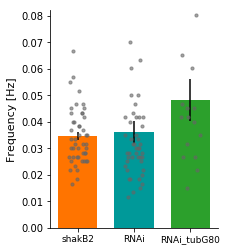

In [13]:
# Make Figure for Osci.Freq, Error bars are std

fig = plt.figure(figsize = (3,4))
plt.subplots_adjust(wspace=0.5)
ax = fig.add_subplot(111)
w=0.7

ax.bar(0,height=[np.mean(freq_max_shakB2_PTX_MEC_Ctrl)],width=w,color='#FF7400',yerr=[stats.sem(freq_max_shakB2_PTX_MEC_Ctrl)])
ax.bar(1,height=[np.mean(freq_max_shakB_RNAi)],width=w,color='#009999',yerr=[stats.sem(freq_max_shakB_RNAi)])
ax.bar(2,height=[np.mean(freq_max_shakB_RNAi_tubG80)],width=w,color='C2',yerr=[stats.sem(freq_max_shakB_RNAi_tubG80)])
ax.axhline(y=0, color='0.4', linewidth='1')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

for i in range(len(freq_max_shakB2_PTX_MEC_Ctrl)):
    ax.scatter(0 + np.random.random(1) * w/2 - w/4,freq_max_shakB2_PTX_MEC_Ctrl[i], s=10, color='0.4', alpha=0.6, zorder = 2)
for i in range(len(freq_max_shakB_RNAi)):
    ax.scatter(1 + np.random.random(1) * w/2 - w/4,freq_max_shakB_RNAi[i], s=10, color='0.4', alpha=0.6, zorder = 2)
for i in range(len(freq_max_shakB_RNAi_tubG80)):
    ax.scatter(2 + np.random.random(1) * w/2 - w/4,freq_max_shakB_RNAi_tubG80[i], s=10, color='0.4', alpha=0.6, zorder = 2)   

#ax.set_title('Max. Osci. Frequency', size=12)
plt.ylim([0,0.082])
ax.set_xticks([0,1,2])
ax.set_xticklabels(('shakB2','RNAi','RNAi_tubG80'), size=9)
ax.set_ylabel('Frequency [Hz]', size=11)
#plt.savefig('Osci_Freq_barplot_shakBRNAi.png',bbox_inches='tight', format='png')
plt.show()